## Step 1 - Preprocessing the Data

In [5]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# Determine the number of unique values in each column.
column_values = application_df.nunique()
column_values

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
app_types_count = application_df['APPLICATION_TYPE'].value_counts()
app_types_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_types_count[app_types_count < 600].index)


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: count, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_types_count = application_df['CLASSIFICATION'].value_counts()
classification_types_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_greater_than1 = classification_types_count.loc[classification_types_count >1]
classification_greater_than1

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_types_count[classification_types_count < 2000].index)


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: count, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_dummies = pd.get_dummies(application_df)
numeric_dummies

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34295,1,5000,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34296,1,5000,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34297,1,5000,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [14]:
# Split our preprocessed data into our features and target arrays
y = numeric_dummies["IS_SUCCESSFUL"].values
X = numeric_dummies.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Step 2 - Compile, Train and Evaluate the Model

In [16]:
# pip install pandas

In [17]:
import pandas as pd

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_count = len(X_train[0])
hidden_nodes_layer1 = 85
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_count, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 85)                3485      
                                                                 
 dense_1 (Dense)             (None, 30)                2580      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6096 (23.81 KB)
Trainable params: 6096 (23.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100


804/804 [==============================] - 2s 2ms/step - loss: 0.5765 - accuracy: 0.7187
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5622 - accuracy: 0.7264
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5592 - accuracy: 0.7258
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5574 - accuracy: 0.7272
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5563 - accuracy: 0.7287
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7284
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7276
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5536 - accuracy: 0.7278
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5528 - accuracy: 0.7281
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5524 - accuracy: 0.7291
E

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5586 - accuracy: 0.7306 - 475ms/epoch - 2ms/step
Loss: 0.5585577487945557, Accuracy: 0.7306122183799744


In [32]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity.h5')

c:\Users\alvar\anaconda3\envs\machlearn\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
import matplotlib.pyplot as plt

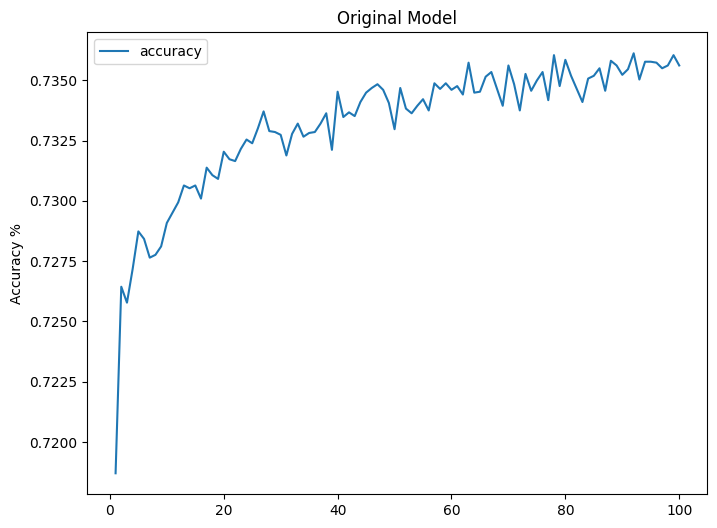

In [30]:
# Plotting data to visualize accuracy
original_model_df = pd.DataFrame(fit_model.history, index= range(1, len(fit_model.history['loss'])+1))
original_model_plot = original_model_df.plot(y='accuracy', title= 'Original Model', ylabel='Accuracy %', figsize=(8,6))

# plt.savefig('Accuracy-Plots/Original-plot.png', format='png', dpi=300)

## Step 3 - Optimize the Model
- Optimize the model to achieve a target predictive accuracy higher than 75% (Current Accuracy = 73.06%)

### 1st Attempt - 73.27%

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_count = len(X_train[0])
hidden_nodes_layer1 = 90
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_count, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 90)                3690      
                                                                 
 dense_7 (Dense)             (None, 30)                2730      
                                                                 


 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6451 (25.20 KB)
Trainable params: 6451 (25.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5787 - accuracy: 0.7184
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5628 - accuracy: 0.7254
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5600 - accuracy: 0.7258
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5577 - accuracy: 0.7265
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5570 - accuracy: 0.7273
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.7281
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5548 - accuracy: 0.7285
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.7286
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5530 - accuracy: 0.7286
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5528 - accura

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5571 - accuracy: 0.7327 - 400ms/epoch - 1ms/step
Loss: 0.5571375489234924, Accuracy: 0.7327113747596741


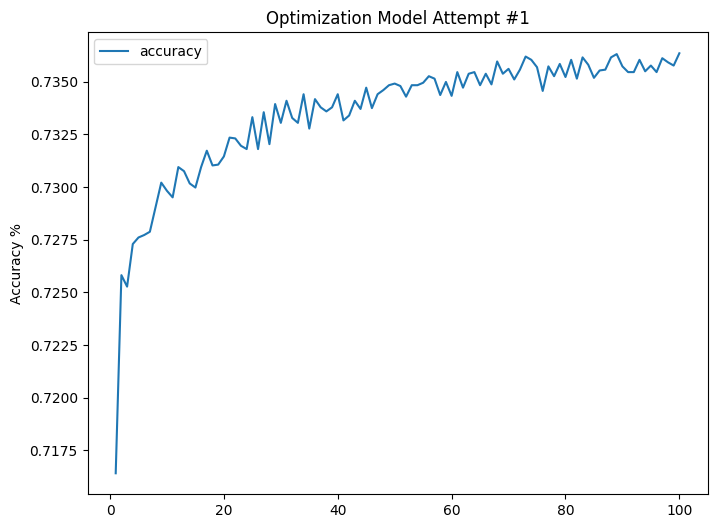

In [48]:
# Plotting data to visualize accuracy
optim_attempt1_model_df = pd.DataFrame(fit_model.history, index= range(1, len(fit_model.history['loss'])+1))
optim_attempt1_model_plot = optim_attempt1_model_df.plot(y='accuracy', title= 'Optimization Model Attempt #1', ylabel='Accuracy %', figsize=(8,6))

plt.savefig('Accuracy-Plots/Optim-Attempt1-plot.png', format='png', dpi=300)

In [38]:
# Export our model to HDF5 file
# nn.save('Models/AlphabetSoupCharity_Optimization1.h5')

c:\Users\alvar\anaconda3\envs\machlearn\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 2nd Attempt - 73.36 %

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_count = len(X_train[0])
hidden_nodes_layer1 = 86
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_count, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 86)                3526      
                                                                 
 dense_10 (Dense)            (None, 30)                2610      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6167 (24.09 KB)
Trainable params: 6167 (24.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5785 - accuracy: 0.7164
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5620 - accuracy: 0.7258
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5593 - accuracy: 0.7253
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5568 - accuracy: 0.7273
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5564 - accuracy: 0.7276
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5553 - accuracy: 0.7277
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5544 - accuracy: 0.7279
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5530 - accuracy: 0.7290
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5520 - accuracy: 0.7302
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5526 - accura

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5611 - accuracy: 0.7336 - 486ms/epoch - 2ms/step
Loss: 0.5611353516578674, Accuracy: 0.7336443066596985


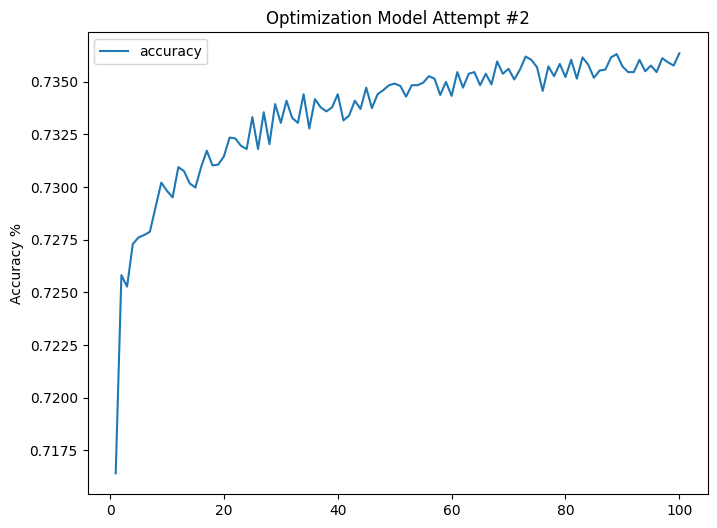

In [47]:
# Plotting data to visualize accuracy
optim_attempt2_model_df = pd.DataFrame(fit_model.history, index= range(1, len(fit_model.history['loss'])+1))
optim_attempt2_model_plot = optim_attempt2_model_df.plot(y='accuracy', title= 'Optimization Model Attempt #2', ylabel='Accuracy %', figsize=(8,6))

plt.savefig('Accuracy-Plots/Optim-Attempt2-plot.png', format='png', dpi=300)

In [49]:
# Export our model to HDF5 file
# nn.save('Models/AlphabetSoupCharity_Optimization2.h5')

c:\Users\alvar\anaconda3\envs\machlearn\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 3rd Attempt - 73.25%

In [50]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_count = len(X_train[1])
hidden_nodes_layer1 = 95
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_count, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 95)                3895      
                                                                 
 dense_13 (Dense)            (None, 30)                2880      
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6806 (26.59 KB)
Trainable params: 6806 (26.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5766 - accuracy: 0.7153
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5614 - accuracy: 0.7261
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5584 - accuracy: 0.7270
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5566 - accuracy: 0.7276
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5548 - accuracy: 0.7292
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5545 - accuracy: 0.7282
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5530 - accuracy: 0.7312
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7290
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5519 - accuracy: 0.7304
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5521 - accura

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5566 - accuracy: 0.7326 - 403ms/epoch - 2ms/step
Loss: 0.5566385984420776, Accuracy: 0.7325947284698486


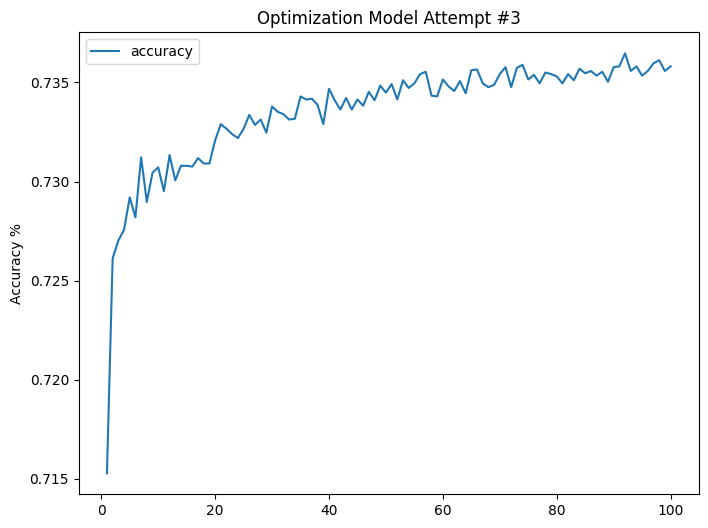

In [54]:
# Plotting data to visualize accuracy
optim_attempt3_model_df = pd.DataFrame(fit_model.history, index= range(1, len(fit_model.history['loss'])+1))
optim_attempt3_model_plot = optim_attempt3_model_df.plot(y='accuracy', title= 'Optimization Model Attempt #3', ylabel='Accuracy %', figsize=(8,6))

plt.savefig('Accuracy-Plots/Optim-Attempt3-plot.png', format='png', dpi=300)

In [55]:
# Export our model to HDF5 file
# nn.save('Models/AlphabetSoupCharity_Optimization3.h5')

c:\Users\alvar\anaconda3\envs\machlearn\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
